In [1]:
import xarray as xr
import os
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
from libs import grade

In [3]:
from libs import series

### Média regional de dados de precipitação dentro de um shapefile

In [5]:
caminho_shapefile = os.path.join(os.getcwd(), "entrada", "shapes", "Bacias", "Sao Simao.shp")

In [9]:
caminho_dataset = os.path.join(os.getcwd(), "entrada", "dados", "precip.mon.mean.nc")

# pegando os dados de precipitação no diretório de entrada
precip = xr.open_dataset(caminho_dataset).precip

# ajusta a coordenada da longitude entre -180 e 180 
precip = precip.assign_coords(lon=(((precip.lon + 180) % 360) - 180)).sortby('lon')

In [10]:
# pegando o shapefile e setando o CRS
recorte = gpd.read_file(caminho_shapefile)
recorte = recorte.set_crs(4326)

Text(0, 0.5, 'mm/dia')

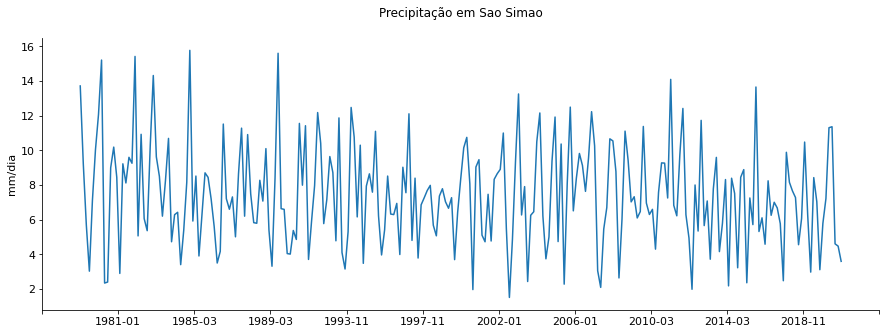

In [11]:
# recortando o netcdf de acordo com o contorno do shapefile
dado_recortado = grade.recorteGrade(recorte, precip)


# inicializando o objeto Grade
obj = grade.Grade(dado_recortado.to_dataset())

# recortando apenas para o período chuvoso
chuvoso = obj.recorteAno([1, 2, 3, 10, 11, 12])

# fazendo a média regional da área
media_regional = chuvoso.aave()

# passando o array de tempo pra string pra evitar lacunas no gráfico
media_regional['time'] = media_regional['time'].dt.strftime("%Y-%m")

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(15,5))
ax.plot(media_regional['time'], media_regional['precip'])
ax.tick_params(axis='x', labelsize=10, rotation=45)

if media_regional['time'].dtype == 'object':
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.linspace(start, end, 12))
    plt.setp(ax.get_xmajorticklabels(), rotation = 0, fontsize=11)
    plt.setp(ax.get_ymajorticklabels(), fontsize=11)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title(f"Precipitação em {re.search('Bacias/(.+?).shp', caminho_shapefile).group(1)}\n")
ax.set_ylabel("mm/dia", fontsize = 11)